In [28]:
import pandas as pd
import numpy as np

from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 0. Theoretical intro

## 1. Example of usage

In [29]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

<ipython-input-30-7493aa86a659>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


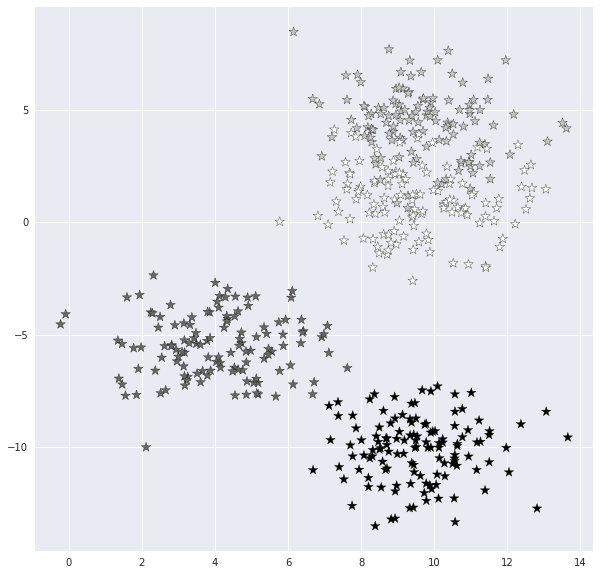

In [30]:
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [32]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 93.60000000000001
Accuracy with k=1 90.4


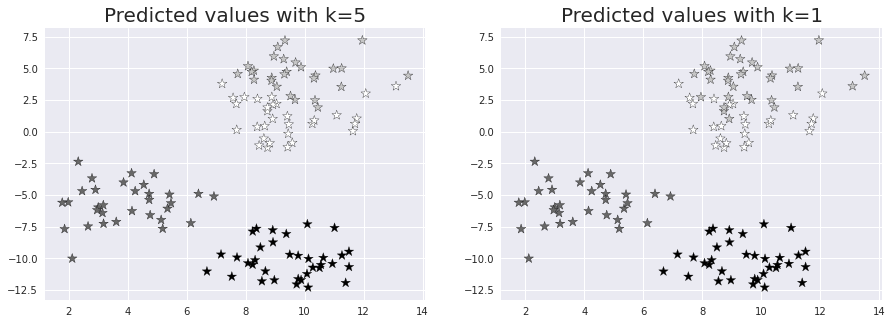

In [35]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()

## 2. Understand the hyperparameters

### 2.1 Metrics - movie recomentation system

(https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-film-statistics-dataset-for-ml?resource=download)

In [36]:
df = pd.read_csv('/data/notebook_files/movie_statistic_dataset.csv')

In [37]:
df

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,Documentary,100.0,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078.0,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,1995-08-09,"Comedy,Drama,Romance",98.0,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986.0,4.231464,50000,10426506,10426506
4377,Gabriela,2001-03-16,"Drama,Romance",93.0,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593.0,2.526405,50000,2335352,2335352
4378,Tiny Furniture,2010-11-12,"Comedy,Drama,Romance",98.0,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595.0,4.242085,50000,391674,424149


Берём наш фильм который нравится - считаем ближайший к нему - проверяем нравится ли он нам?

### 2.2 Number of neighbors (K) - Iris flowers classification

(https://dunglai.github.io/2017/12/09/k-nearest-neighbors/)

In [38]:
iris = datasets.load_iris()
iris_X = iris.data # 150 data points, 4 features (Petal Length , Petal Width , Sepal Length , Sepal width)
iris_y = iris.target # label/class of 150 data points (0,1,2)

In [39]:
iris_X, iris_y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

### 2.3 Ulimate example (KNN) - loan 

(https://medium.com/machine-learning-with-python/k-nearest-neighbour-knn-implementation-in-python-498daa39c16e)

(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [40]:
#Reading the dataset
dataset = pd.read_csv('/data/notebook_files/loan_data_set.csv')

In [41]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Male 489
Female 112
Name: Gender, dtype: int64

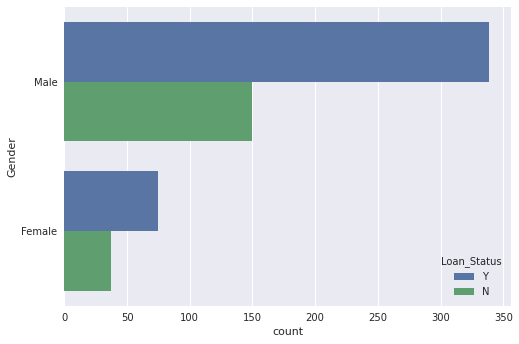

In [42]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = dataset)
dataset['Gender'].value_counts()

Yes 398
No 213
Name: Married, dtype: int64

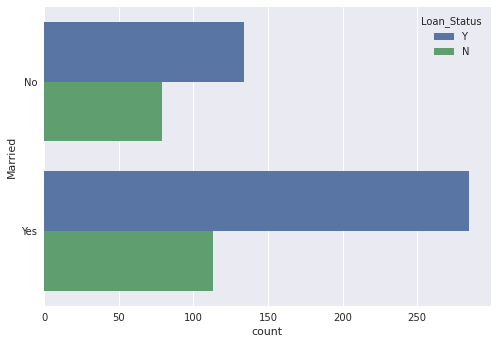

In [43]:
sns.countplot(y= 'Married', hue= 'Loan_Status', data= dataset)
dataset['Married'].value_counts()

Graduate 480
Not Graduate 134
Name: Education, dtype: int64

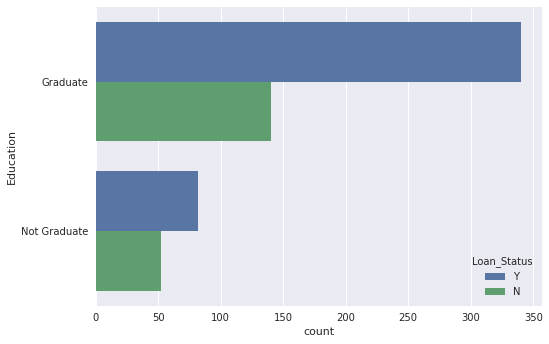

In [44]:
sns.countplot(y = 'Education', hue = 'Loan_Status', data = dataset)
dataset['Education'].value_counts()